In [8]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import patsy
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [6]:
master2 = pd.read_csv("~/Desktop/DSI_Capstone/master2.csv", encoding = "utf-8")
master_mi = pd.read_csv("~/Desktop/DSI_Capstone/mastermi.csv", encoding = "utf-8")
master_revised = pd.read_csv("~/Desktop/DSI_Capstone/masterrevised.csv", encoding = "utf-8")

In [7]:
X = master_revised.drop(["f_rate", "D1", "D2", "PU", "chol_per_1000",
                         "death_by_chol_per_100k", "P", "CHW", "MI", "chol_cat"], axis = 1)
y = master_revised["chol_cat"]

In [ ]:
X_train, X_test, y_train, y_test = 

In [ ]:
Index([u'pop', u'F', u'LE', u'PG', u'PR', u'PRG', u'PUG', u'S', u'SU', u'SR',
       u'W', u'WU', u'WR', u'OD', u'ODU', u'ODR', u'temp_c', u'rain_mm'],
      dtype='object')

In [23]:
def Super_Fit_Models():
    X = patsy.dmatrix("pop + F*LE + PR + PRG*PUG*PG + S*SU*SR + W*WU*WR + OD*ODU*ODR + temp_c + rain_mm", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
    X = pd.DataFrame(X, columns=X.design_info.column_names)
    y = master_revised.chol_cat
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, test_size = 0.3)
      # prepare configuration for cross validation test harness
    seed = 7
      # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RF', RandomForestClassifier()))
      # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: 0.472105 (0.084212)
LDA: 0.573421 (0.105968)
KNN: 0.415526 (0.148223)
CART: 0.507632 (0.105430)
NB: 0.497632 (0.149387)
SVM: 0.248421 (0.087661)
RF: 0.563684 (0.124403)


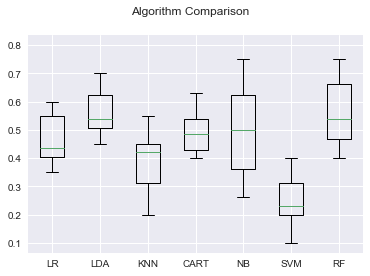

In [24]:
Super_Fit_Models()

In [25]:
X = patsy.dmatrix("pop + F*LE + PR + PRG*PUG*PG + S*SU*SR + W*WU*WR + OD*ODU*ODR + temp_c + rain_mm", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
X = pd.DataFrame(X, columns=X.design_info.column_names)
y = master_revised.chol_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, test_size = 0.3)

In [26]:
rf = RandomForestClassifier(n_jobs = -1, class_weight = "balanced_subsample", random_state = 88)

In [31]:
# param_grid = { 
#     'n_estimators': [200, 700],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

params = {"n_estimators":[10, 15, 20],
         "criterion":["gini", "entropy"],
         "max_depth":[3, 4, 5],
          "class_weight":["balanced", "balanced_subsample", None]
         }

In [32]:
rfcv = GridSearchCV(estimator = rf, param_grid = params, cv = 5, verbose = 1)

In [33]:
rfcv.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=88, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 15, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5], 'class_weight': ['balanced', 'balanced_subsample', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [34]:
print rfcv.best_params_

{'n_estimators': 10, 'criterion': 'entropy', 'max_depth': 3, 'class_weight': 'balanced_subsample'}


In [35]:
rf = RandomForestClassifier(n_jobs = -1, class_weight = "balanced_subsample", random_state = 41, criterion = "entropy", max_depth = 3)

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=41, verbose=0, warm_start=False)

In [37]:
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.611764705882


(-1, 36)

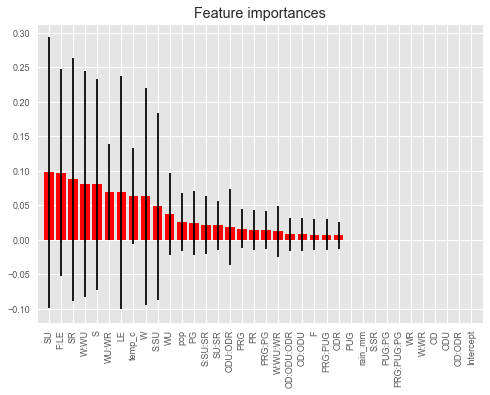

In [43]:
sns.set(font_scale = 0.9)
plt.style.use("ggplot")
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
fig1 = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [ ]:
# SU, F:LE, LE, SR, W:WU, S, WU:WR, temp_c, W, S:SU, WU,
# temp_c + F*LE + S*SU*SR + W*WU*WR

In [46]:
def Super_Fit_Models_2():
    X = patsy.dmatrix("SU + F:LE + SR + W:WU + S + WU:WR + LE + temp_c + W + S:SU + WU", master_revised)
    #X = patsy.dmatrix("temp_c + F*LE + S*SU*SR + W*WU*WR", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
    X = pd.DataFrame(X, columns=X.design_info.column_names)
    y = master_revised.chol_cat
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, test_size = 0.3)
      # prepare configuration for cross validation test harness
    seed = 7
      # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RF', RandomForestClassifier()))
      # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: 0.563421 (0.084247)
LDA: 0.583421 (0.100532)
KNN: 0.518421 (0.111940)
CART: 0.497368 (0.143265)
NB: 0.569474 (0.141525)
SVM: 0.294211 (0.035537)
RF: 0.543947 (0.130639)


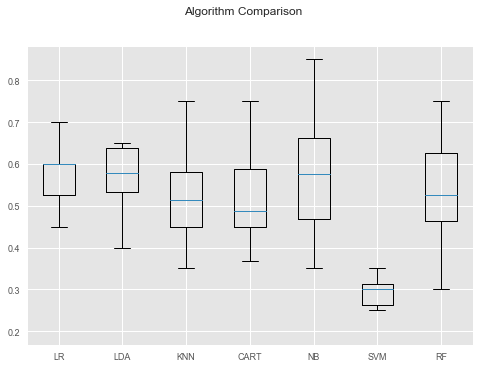

In [47]:
Super_Fit_Models_2()

In [48]:
gnb = GaussianNB()

In [49]:
X = patsy.dmatrix("SU + F:LE + SR + W:WU + S + WU:WR + LE + temp_c + W + S:SU + WU", master_revised)
    #X = patsy.dmatrix("temp_c + F*LE + S*SU*SR + W*WU*WR", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
X = pd.DataFrame(X, columns=X.design_info.column_names)
y = master_revised.chol_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, test_size = 0.3)

In [50]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [51]:
y_pred = gnb.predict(X_test)
print gnb.score(X_test, y_test)

0.588235294118


In [54]:
confusion_matrix(y_test, y_pred)

array([[20,  1,  1,  0],
       [ 3,  7,  4,  1],
       [ 2,  2,  7,  9],
       [ 0,  2, 10, 16]])

In [56]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          1       0.80      0.91      0.85        22
          2       0.58      0.47      0.52        15
          3       0.32      0.35      0.33        20
          4       0.62      0.57      0.59        28

avg / total       0.59      0.59      0.59        85



In [58]:
Xrf = patsy.dmatrix("pop + F*LE + PR + PRG*PUG*PG + S*SU*SR + W*WU*WR + OD*ODU*ODR + temp_c + rain_mm", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
Xrf = pd.DataFrame(Xrf, columns=Xrf.design_info.column_names)
yrf = master_revised.chol_cat
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, random_state = 9, test_size = 0.3)

In [59]:
rf = RandomForestClassifier(n_jobs = -1, class_weight = "balanced_subsample", random_state = 41, criterion = "entropy", max_depth = 3)

In [61]:
rf.fit(Xrf_train, yrf_train)
yrf_pred = rf.predict(Xrf_test)
print rf.score(Xrf_test, yrf_test)

0.611764705882


In [62]:
confusion_matrix(yrf_test, yrf_pred)

array([[20,  1,  1,  0],
       [ 0,  9,  5,  1],
       [ 0,  4, 11,  5],
       [ 1,  2, 13, 12]])

In [63]:
print classification_report(yrf_test, yrf_pred)

             precision    recall  f1-score   support

          1       0.95      0.91      0.93        22
          2       0.56      0.60      0.58        15
          3       0.37      0.55      0.44        20
          4       0.67      0.43      0.52        28

avg / total       0.65      0.61      0.62        85



In [64]:
##Classification Report:
#Precision: when predicting, 0, how often correct? = TN / TN + FN  
    #when predicting 1, how often correct? = TP / TP + FP 
    
#Recall(1) = Sensitivity = TP / TP + FN = 
    #Recall(0) = How often does model predict no, when it is actually no?
            #TN / TN + FP
#f1-score = weighted average of precision and recall
    #f1 = 2*(precision*recall) / (precision+recall)

#support = number of observations for each class in actual data (not predictions)

In [80]:
Xrf2 = patsy.dmatrix("SU + F:LE + SR + W:WU + S + WU:WR + LE + temp_c + W + S:SU + WU", master_revised)
    #X = patsy.dmatrix("temp_c + F*LE + S*SU*SR + W*WU*WR", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
Xrf2 = pd.DataFrame(Xrf2, columns=Xrf2.design_info.column_names)
yrf2 = master_revised.chol_cat
Xrf2_train, Xrf2_test, yrf2_train, yrf2_test = train_test_split(Xrf2, yrf2, stratify = yrf2, random_state = 9, test_size = 0.3)

In [81]:
rf2 = RandomForestClassifier(n_jobs = -1, class_weight = "balanced_subsample", random_state = 41, criterion = "entropy", max_depth = 3)

In [82]:
rf2.fit(Xrf2_train, yrf2_train)
yrf2_pred = rf2.predict(Xrf2_test)
print rf2.score(Xrf2_test, yrf2_test)

0.552941176471


In [83]:
confusion_matrix(yrf2_test, yrf2_pred)

array([[15,  5,  0,  2],
       [ 3,  8,  6,  4],
       [ 0,  4,  8,  9],
       [ 0,  1,  4, 16]])

In [84]:
print classification_report(yrf2_test, yrf2_pred)

             precision    recall  f1-score   support

          1       0.83      0.68      0.75        22
          2       0.44      0.38      0.41        21
          3       0.44      0.38      0.41        21
          4       0.52      0.76      0.62        21

avg / total       0.56      0.55      0.55        85



In [ ]:
##let's rethink the classes we're predicting

In [86]:
Q3 = np.percentile(master_revised.chol_per_1000, 75)
Q4 = np.percentile(master_revised.chol_per_1000, 100)
Q2 = np.percentile(master_revised.chol_per_1000, 50)
Q1 = np.percentile(master_revised.chol_per_1000, 25)
print Q4
print Q3
print Q2
print Q1

33.5450655453
0.0816296069642
0.0079627039732
0.00026282364341


In [88]:
cholmax = np.percentile(master_revised.chol_per_1000, 100)

In [89]:
def cut_it_twice(numseries):
    try:
        if numseries <= 0.17:
            return 1
        elif numseries <= 0.55:
            return 2
        elif numseries <= cholmax:
            return 3
    except:
        pass

In [91]:
master_revised["chol_cat_3"] = master_revised.apply(lambda row: cut_it_twice(row["chol_per_1000"]), axis = 1)

In [92]:
master_revised.chol_cat_3.value_counts()

1    228
2     30
3     24
Name: chol_cat_3, dtype: int64

In [95]:
228 / (228+30+24) ## 80.9% of data is below "average" cholera rate

0.8085106382978723

In [96]:
30 / (228+30+24) ## 10.6% of data is "average" cholera rate

0.10638297872340426

In [97]:
24 / (228+30+24) ## 08.5% of data is above "average" cholera rate

0.0851063829787234

In [99]:
def Super_Fit_Models_2():
    X = patsy.dmatrix("SU + F:LE + SR + W:WU + S + WU:WR + LE + temp_c + W + S:SU + WU", master_revised)
    #X = patsy.dmatrix("temp_c + F*LE + S*SU*SR + W*WU*WR", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
    X = pd.DataFrame(X, columns=X.design_info.column_names)
    y = master_revised.chol_cat_3
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, test_size = 0.3)
      # prepare configuration for cross validation test harness
    seed = 7
      # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RF', RandomForestClassifier()))
      # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: 0.853421 (0.056060)
LDA: 0.848421 (0.083078)
KNN: 0.838421 (0.061403)
CART: 0.782105 (0.074076)
NB: 0.665263 (0.086777)
SVM: 0.833158 (0.073667)
RF: 0.833158 (0.066535)


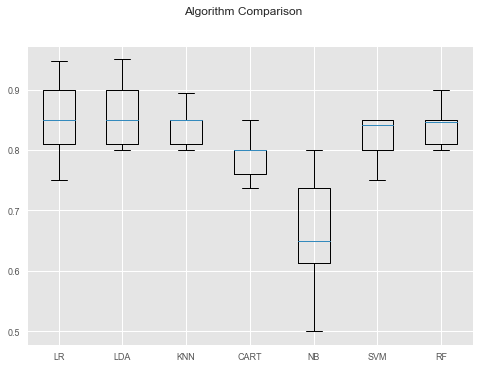

In [100]:
Super_Fit_Models_2()

In [101]:
XX = patsy.dmatrix("SU + F:LE + SR + W:WU + S + WU:WR + LE + temp_c + W + S:SU + WU", master_revised)
    #X = patsy.dmatrix("temp_c + F*LE + S*SU*SR + W*WU*WR", master_revised)
    #X = patsy.dmatrix("pop + F*LE*PR*PG*W*OD*S + temp_c + rain_mm", master_revised)
XX = pd.DataFrame(XX, columns=XX.design_info.column_names)
yy = master_revised.chol_cat_3
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, stratify = yy, random_state = 9, test_size = 0.3)

In [104]:
rf3 = RandomForestClassifier(n_jobs = -1, class_weight = {1:0.809, 2:0.106, 3:.085}, random_state = 88)

In [105]:
rf3cv = GridSearchCV(estimator = rf, param_grid = params, cv = 5, verbose = 1)

In [106]:
rf3cv.fit(XX, yy)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=41, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 15, 20], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5], 'class_weight': ['balanced', 'balanced_subsample', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [107]:
print rf3cv.best_params_

{'n_estimators': 10, 'criterion': 'gini', 'max_depth': 4, 'class_weight': None}


In [182]:
rftuned = RandomForestClassifier(n_jobs = -1, class_weight = {1:0.8, 2:5, 3:15},
                             max_depth = 4, random_state = 88)

In [183]:
rftuned.fit(XX_train, yy_train)
yy_pred = rftuned.predict(XX_test)
print rftuned.score(XX_test, yy_test)

0.811764705882


In [184]:
confusion_matrix(yy_test, yy_pred)

array([[58,  7,  4],
       [ 1,  7,  1],
       [ 2,  1,  4]])

In [185]:
print classification_report(yy_test, yy_pred)

             precision    recall  f1-score   support

          1       0.95      0.84      0.89        69
          2       0.47      0.78      0.58         9
          3       0.44      0.57      0.50         7

avg / total       0.86      0.81      0.83        85



In [115]:
confusion_matrix(yy_test, yyw_pred)

array([[66,  3,  0],
       [ 6,  3,  0],
       [ 4,  2,  1]])

(-1, 12)

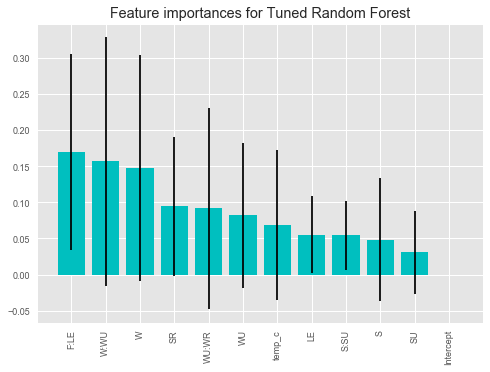

In [198]:
plt.style.use("ggplot")
all(rftuned.feature_importances_ == np.mean([tree.feature_importances_ for tree in rftuned.estimators_], axis=0))

importances = rftuned.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest

std = np.std([tree.feature_importances_ for tree in rftuned.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = XX.columns

# Plot the feature importances of the forest
fig1 = plt.figure()
plt.title("Feature importances for Tuned Random Forest")
plt.bar(range(XX.shape[1]), importances[indices],
       color="c", yerr=std[indices], align="center")
plt.xticks(range(XX.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, XX.shape[1]])

In [ ]:
# rfcv3 = GridSearchCV(estimator = rftuned, param_grid = params, cv = 5, verbose = 1)

In [199]:
master_revised.to_csv("~/Desktop/DSI_Capstone/masterrevised2.csv", encoding = "utf-8", index = False)

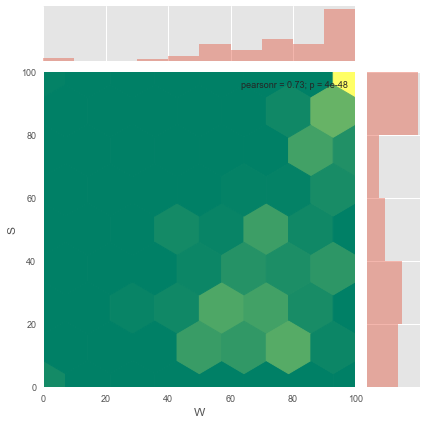

In [223]:
sx = master_revised.W
sy = master_revised.S
sns.jointplot(sx, sy, kind = "hex", cmap = "summer")

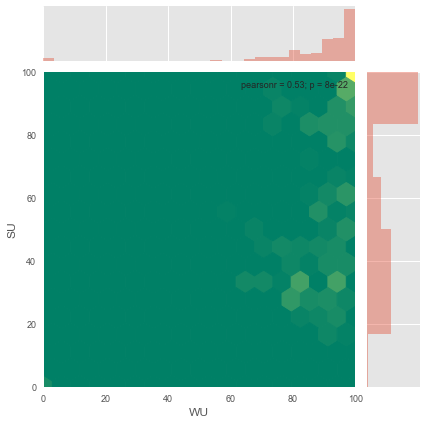

In [224]:
sx = master_revised.WU
sy = master_revised.SU
sns.jointplot(sx, sy, kind = "hex", cmap = "summer")

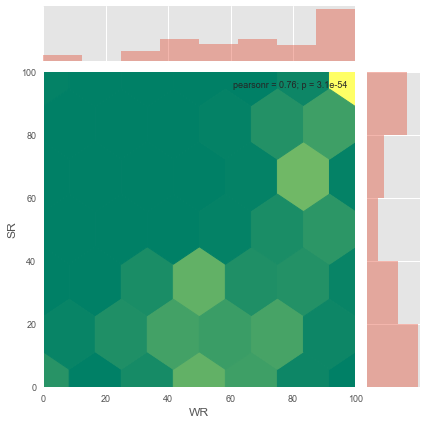

In [225]:
sx = master_revised.WR
sy = master_revised.SR
sns.jointplot(sx, sy, kind = "hex", cmap = "summer")

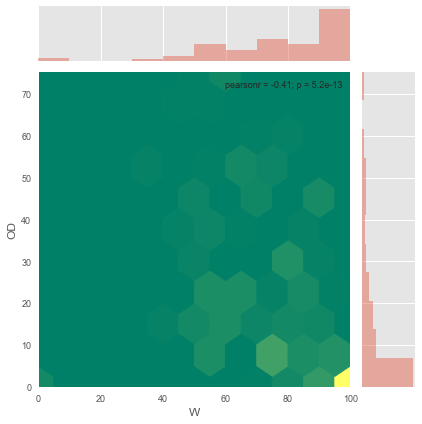

In [227]:
sx = master_revised.W
sy = master_revised.OD
sns.jointplot(sx, sy, kind = "hex", cmap = "summer")

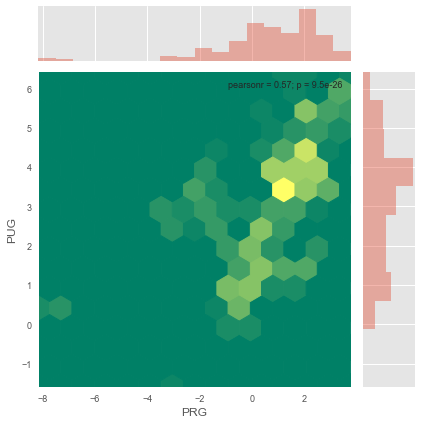

In [232]:
sx = master_revised.PRG
sy = master_revised.PUG
sns.jointplot(sx, sy, kind = "hex", cmap = "summer")

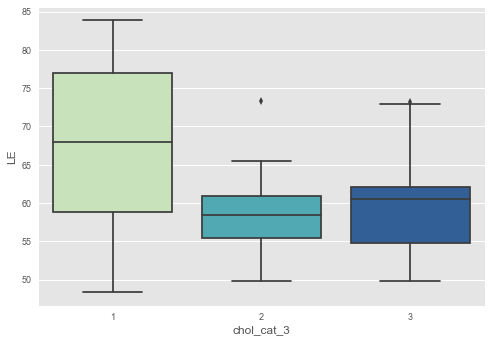

In [243]:
sns.boxplot(x = "chol_cat_3", y = "LE", data = master_revised,
            orient = "v", palette = "YlGnBu")

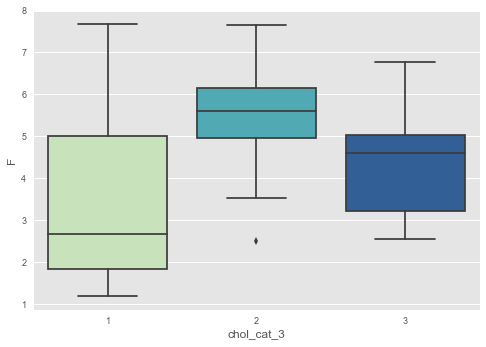

In [244]:
sns.boxplot(x = "chol_cat_3", y = "F", data = master_revised,
            orient = "v", palette = "YlGnBu")

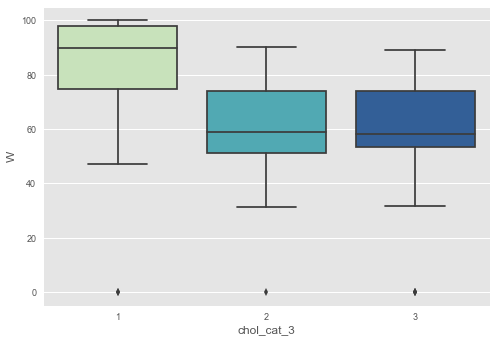

In [246]:
sns.boxplot(x = "chol_cat_3", y = "W", data = master_revised,
            orient = "v", palette = "YlGnBu")

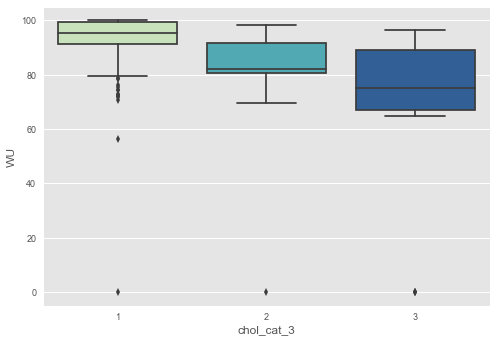

In [247]:
sns.boxplot(x = "chol_cat_3", y = "WU", data = master_revised,
            orient = "v", palette = "YlGnBu")

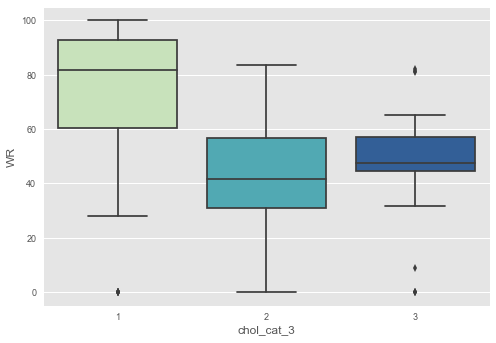

In [248]:
sns.boxplot(x = "chol_cat_3", y = "WR", data = master_revised,
            orient = "v", palette = "YlGnBu")

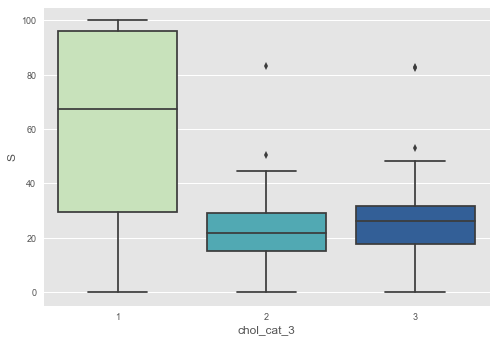

In [249]:
sns.boxplot(x = "chol_cat_3", y = "S", data = master_revised,
            orient = "v", palette = "YlGnBu")

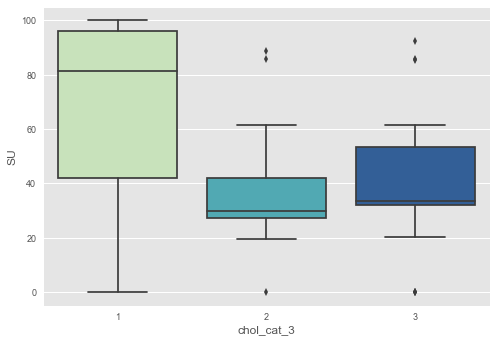

In [250]:
sns.boxplot(x = "chol_cat_3", y = "SU", data = master_revised,
            orient = "v", palette = "YlGnBu")

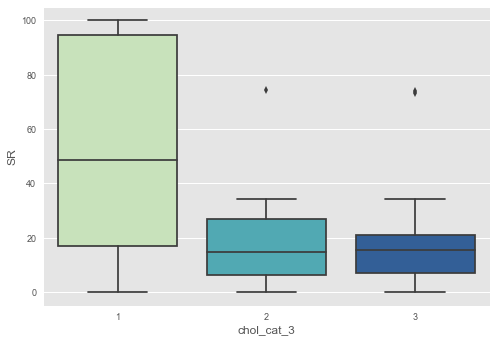

In [251]:
sns.boxplot(x = "chol_cat_3", y = "SR", data = master_revised,
            orient = "v", palette = "YlGnBu")

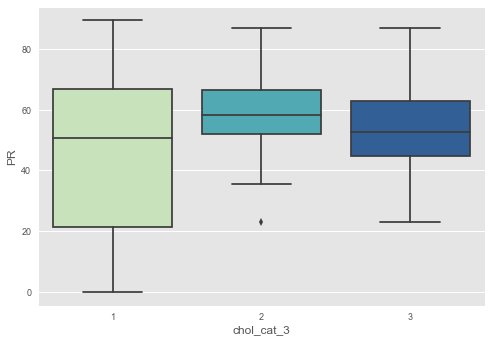

In [252]:
sns.boxplot(x = "chol_cat_3", y = "PR", data = master_revised,
            orient = "v", palette = "YlGnBu")

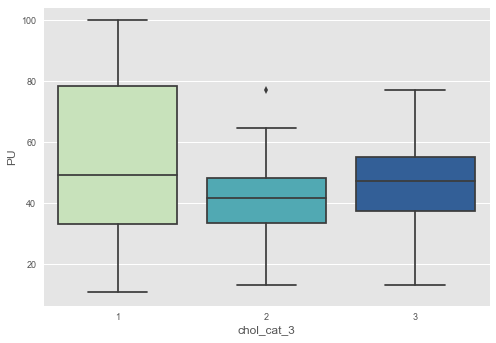

In [253]:
sns.boxplot(x = "chol_cat_3", y = "PU", data = master_revised,
            orient = "v", palette = "YlGnBu")

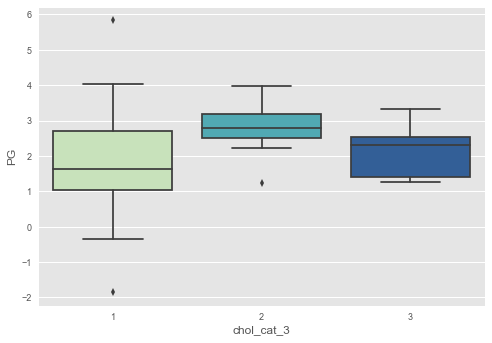

In [254]:
sns.boxplot(x = "chol_cat_3", y = "PG", data = master_revised,
            orient = "v", palette = "YlGnBu")

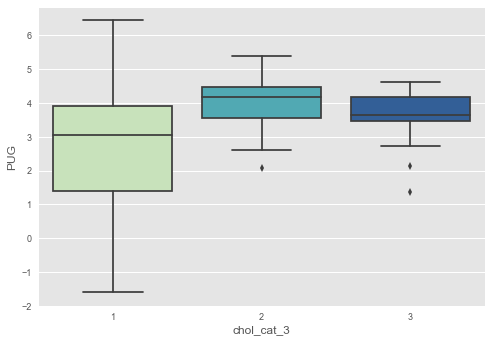

In [255]:
sns.boxplot(x = "chol_cat_3", y = "PUG", data = master_revised,
            orient = "v", palette = "YlGnBu")

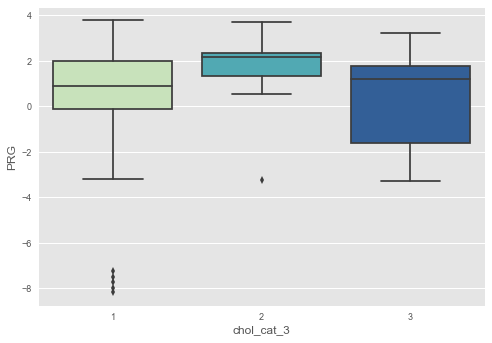

In [256]:
sns.boxplot(x = "chol_cat_3", y = "PRG", data = master_revised,
            orient = "v", palette = "YlGnBu")

In [257]:
XX.columns

Index([u'Intercept', u'SU', u'F:LE', u'SR', u'W:WU', u'S', u'WU:WR', u'LE',
       u'temp_c', u'W', u'S:SU', u'WU'],
      dtype='object')

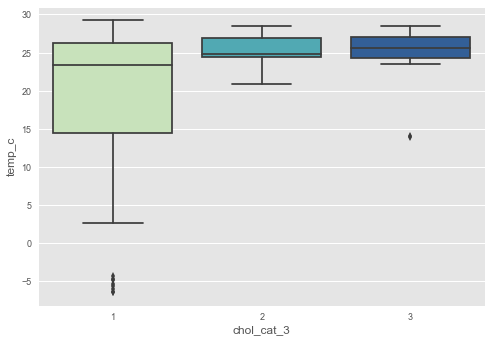

In [258]:
sns.boxplot(x = "chol_cat_3", y = "temp_c", data = master_revised,
            orient = "v", palette = "YlGnBu")